In [29]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


In [23]:
from numpy import load
data=load('mnist_digitData.npz')
list = data.files
for item in list:
    print(item)
    print(data[item])

x_test
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 

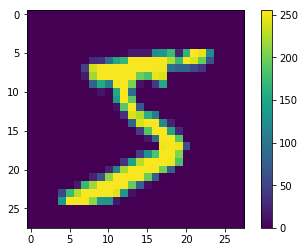

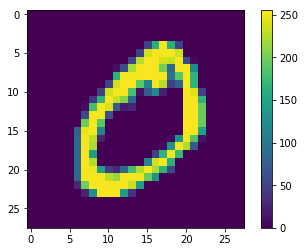

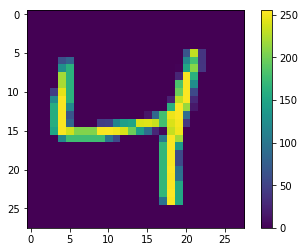

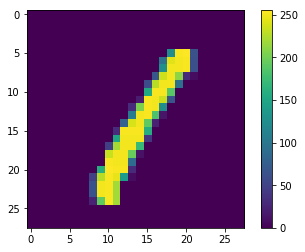

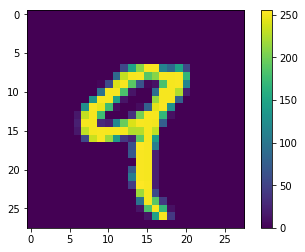

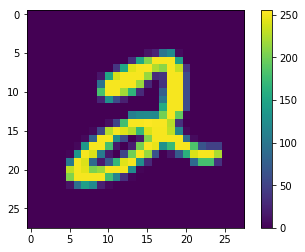

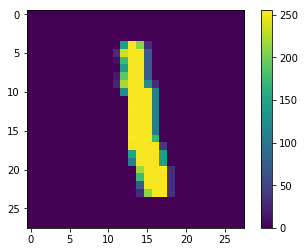

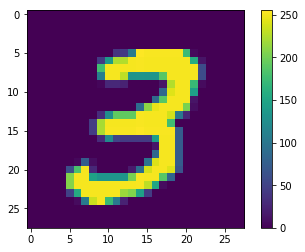

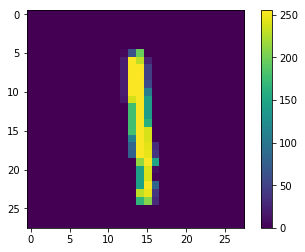

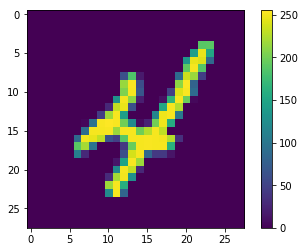

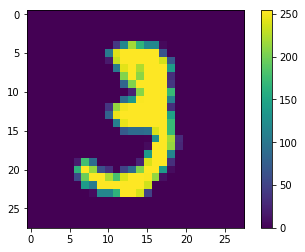

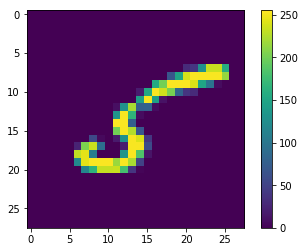

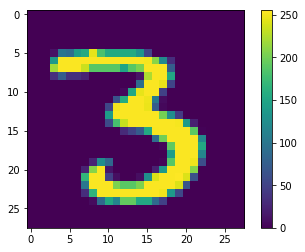

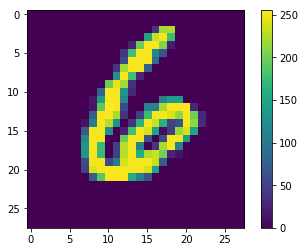

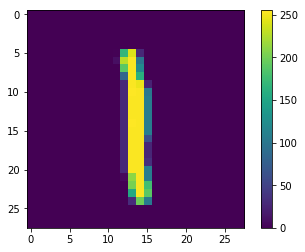

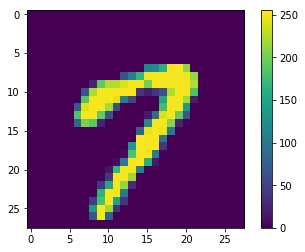

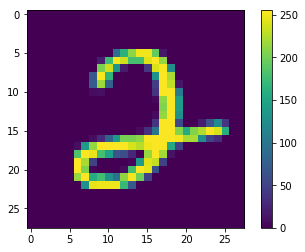

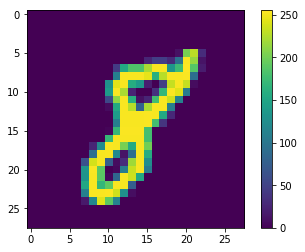

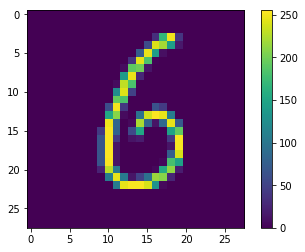

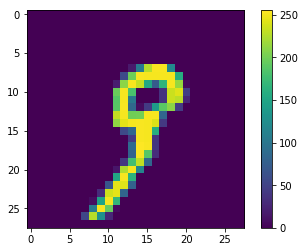

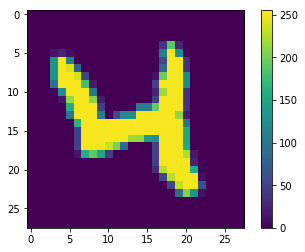

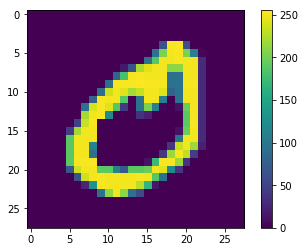

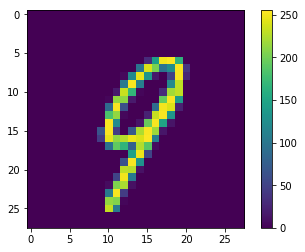

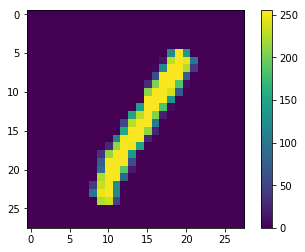

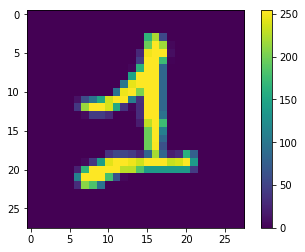

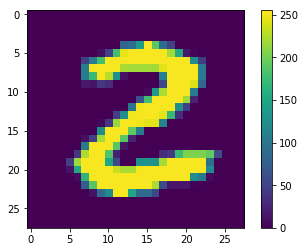

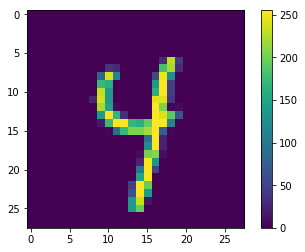

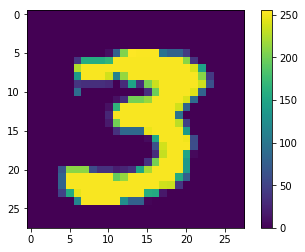

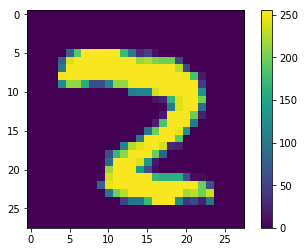

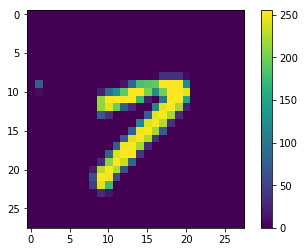

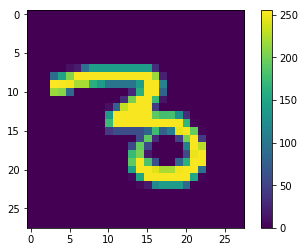

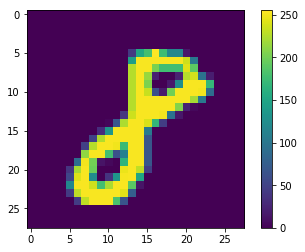

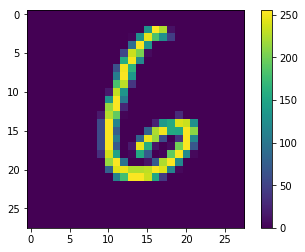

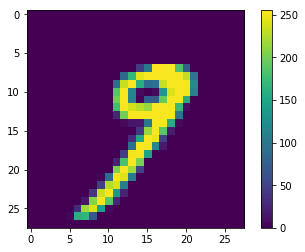

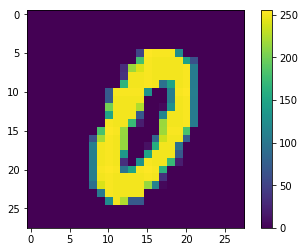

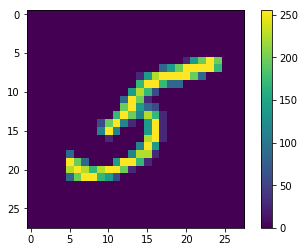

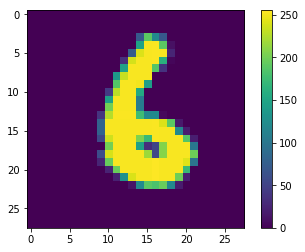

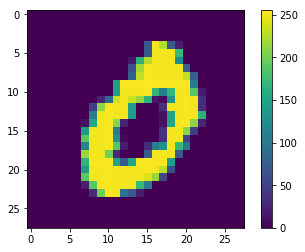

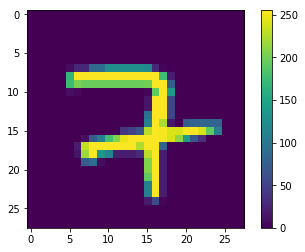

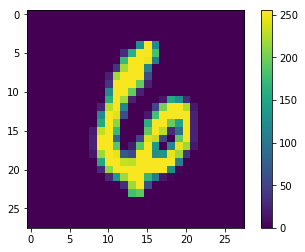

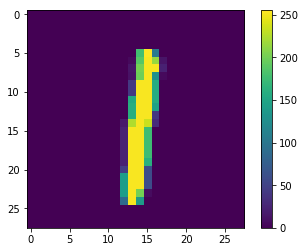

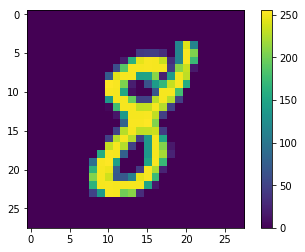

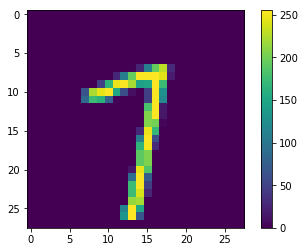

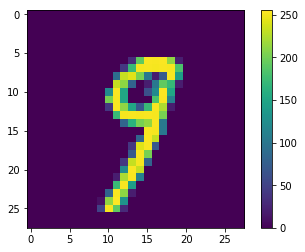

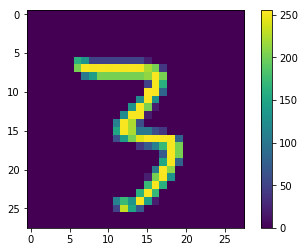

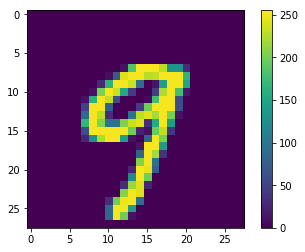

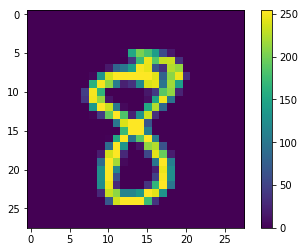

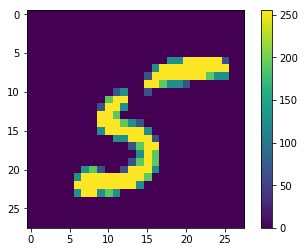

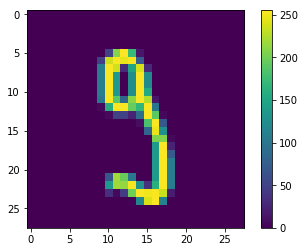

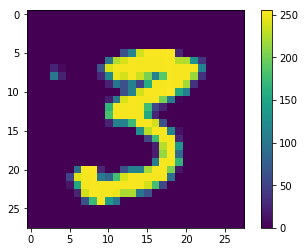

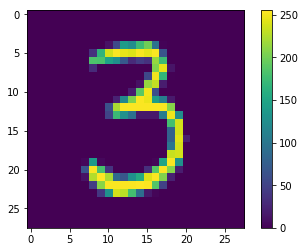

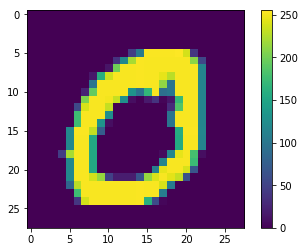

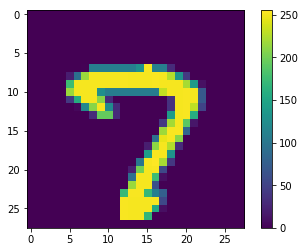

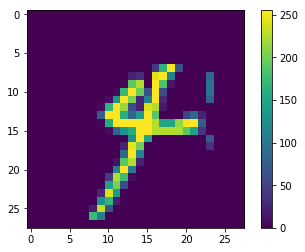

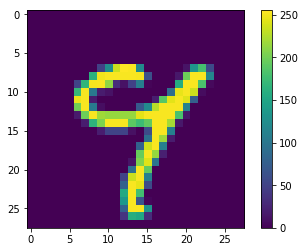

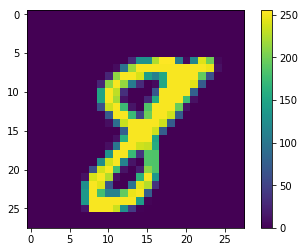

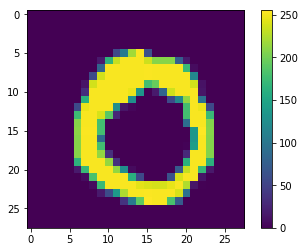

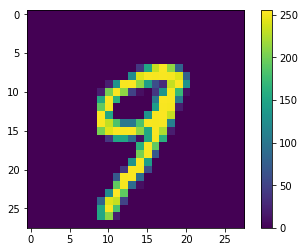

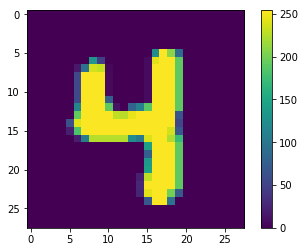

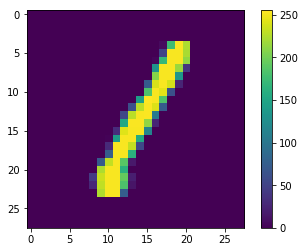

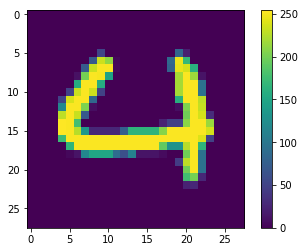

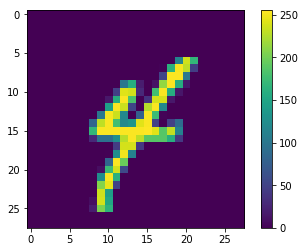

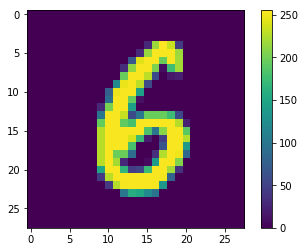

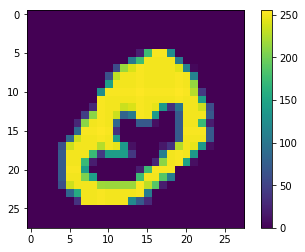

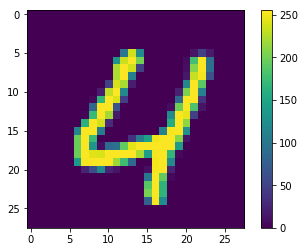

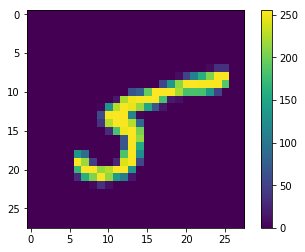

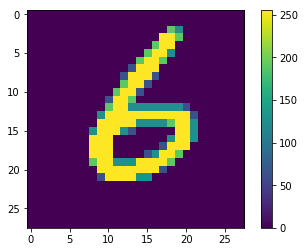

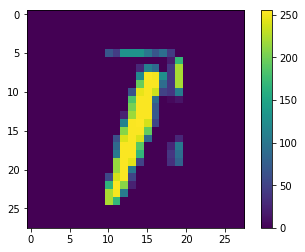

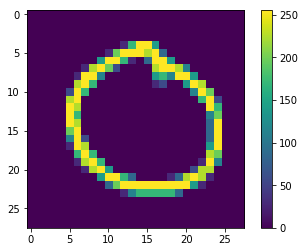

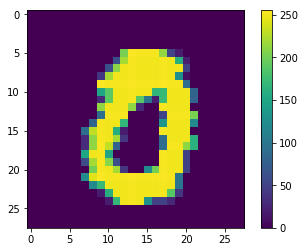

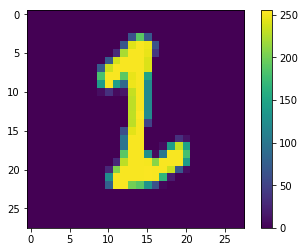

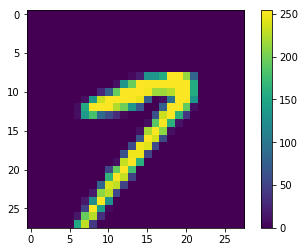

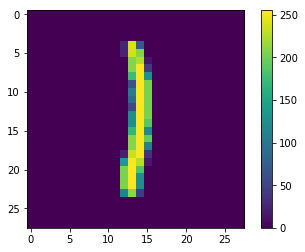

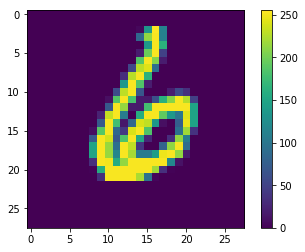

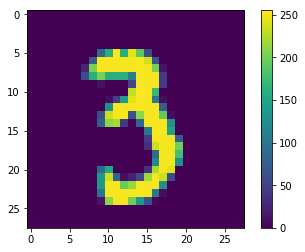

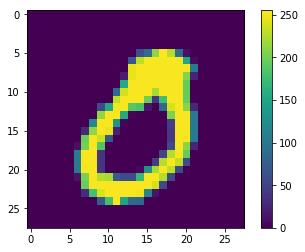

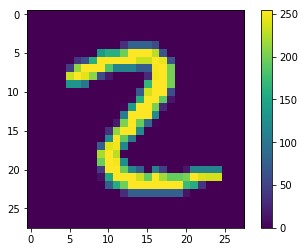

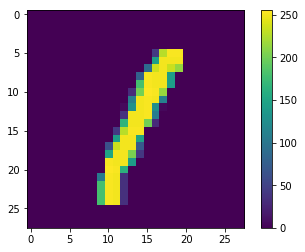

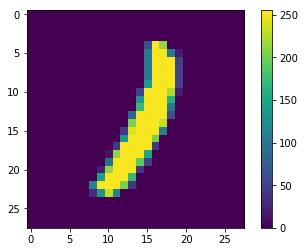

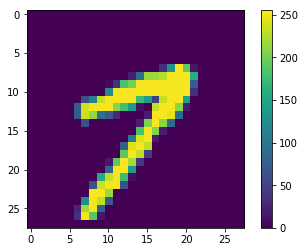

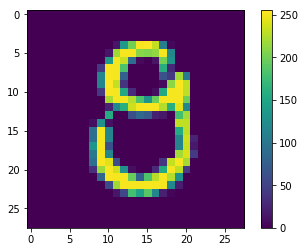

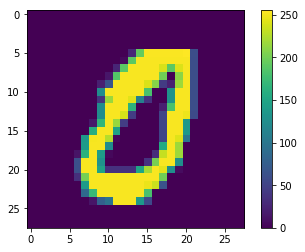

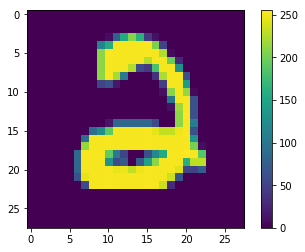

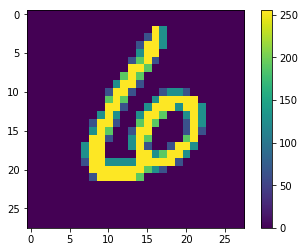

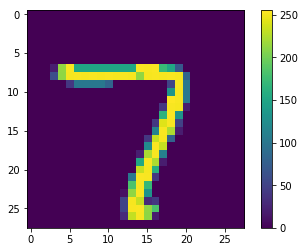

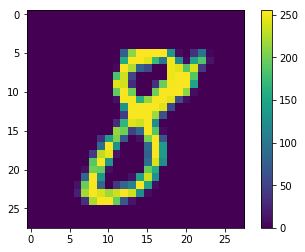

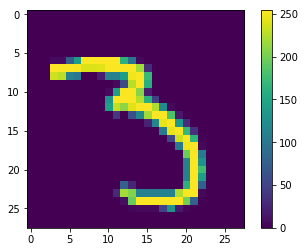

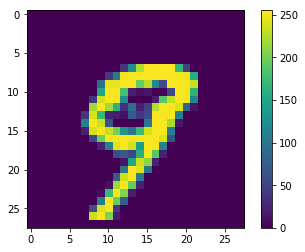

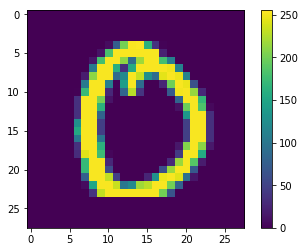

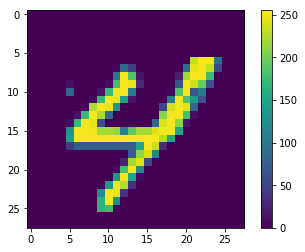

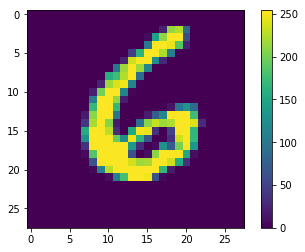

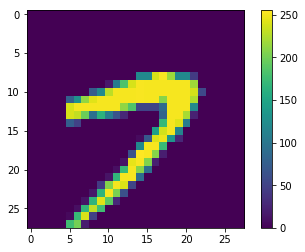

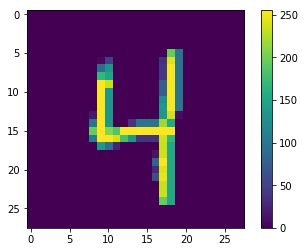

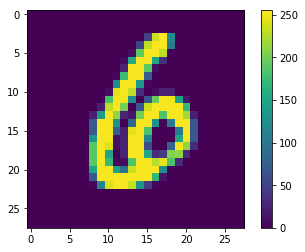

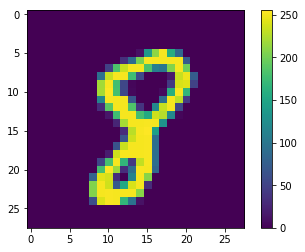

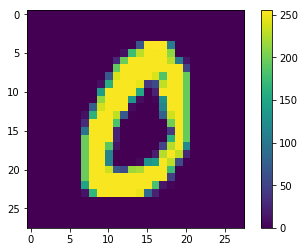

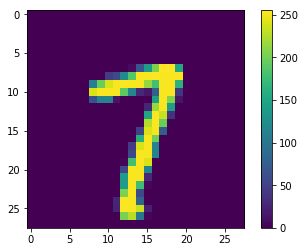

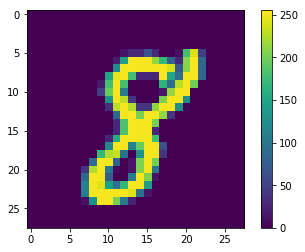

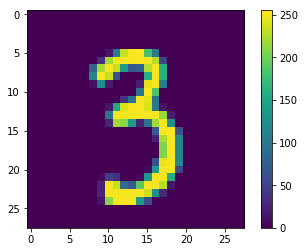

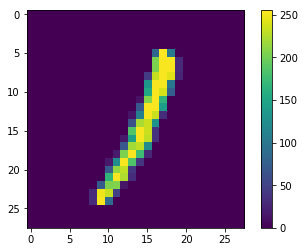

In [44]:
for i in range(0,100):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

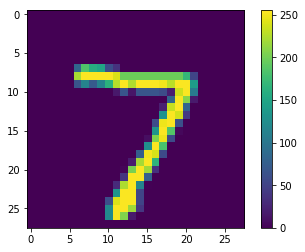

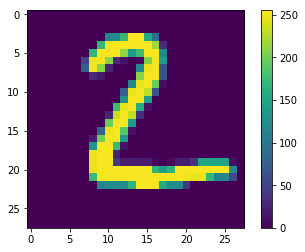

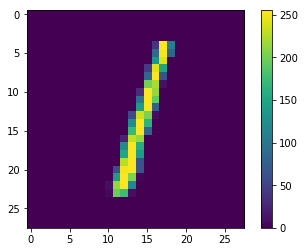

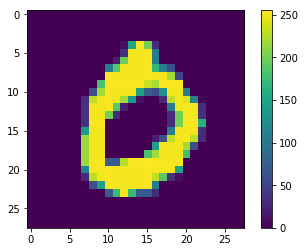

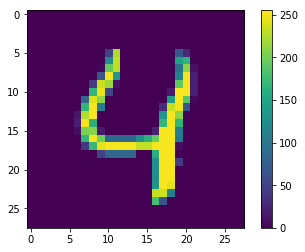

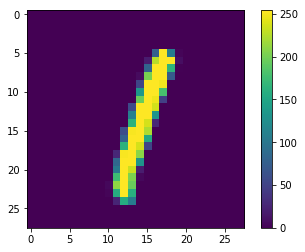

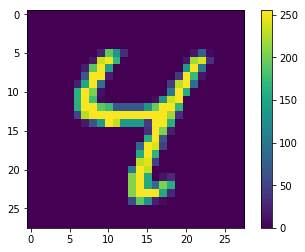

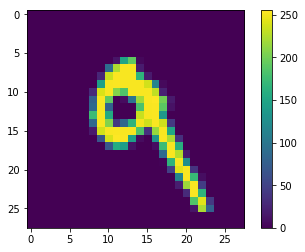

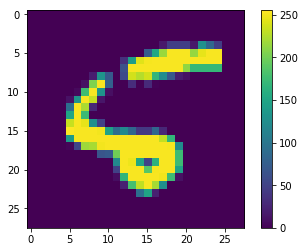

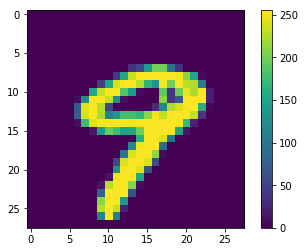

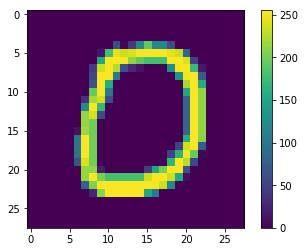

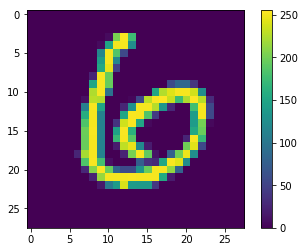

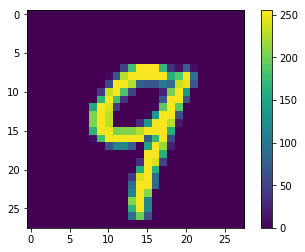

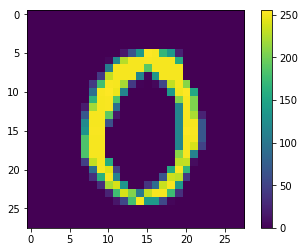

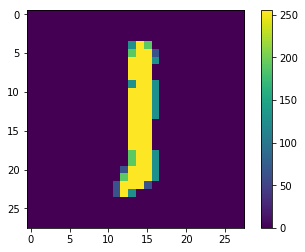

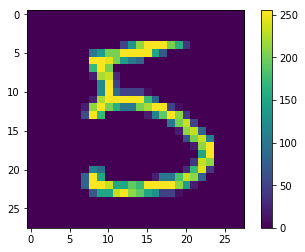

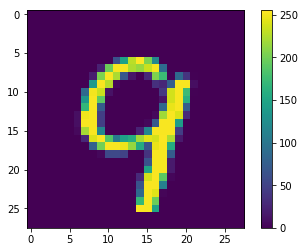

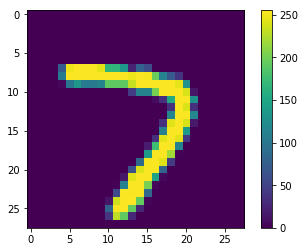

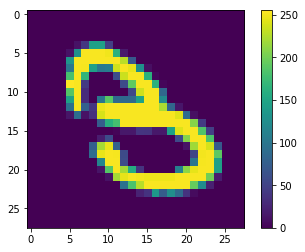

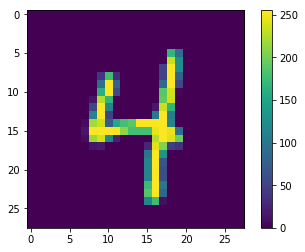

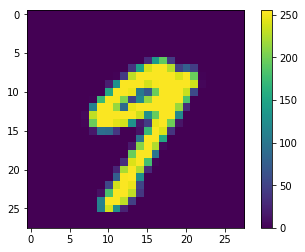

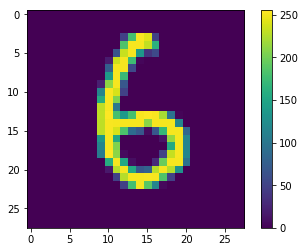

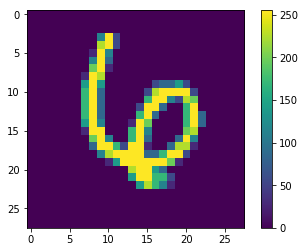

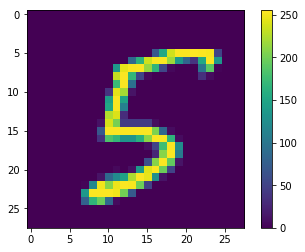

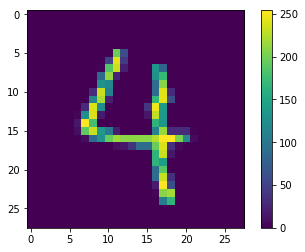

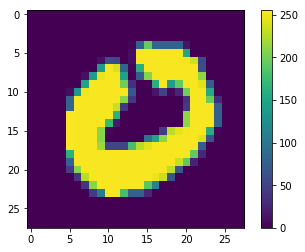

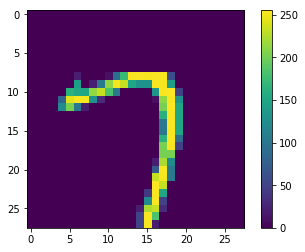

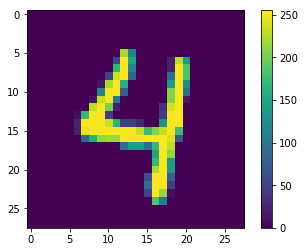

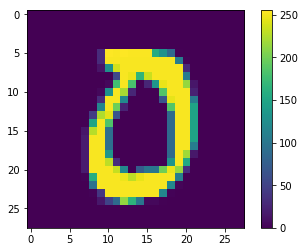

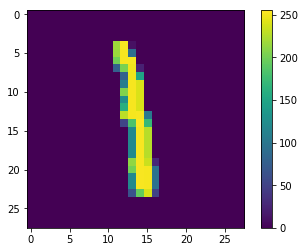

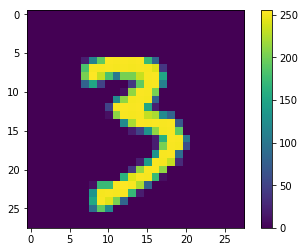

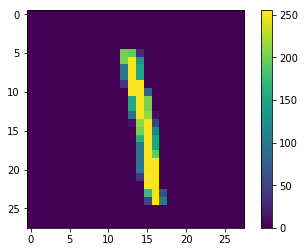

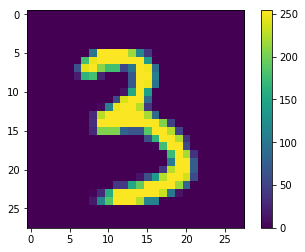

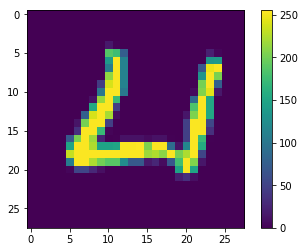

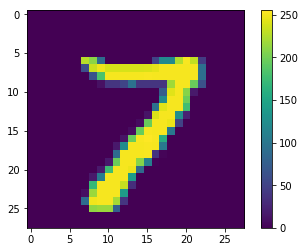

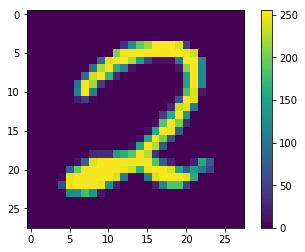

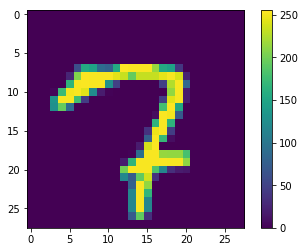

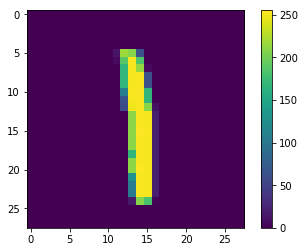

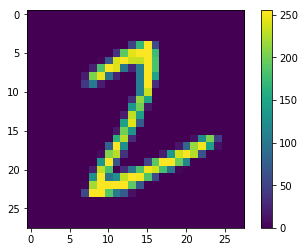

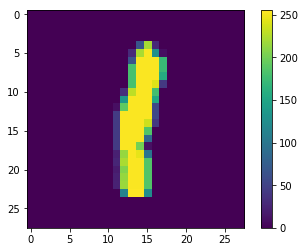

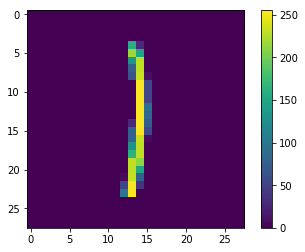

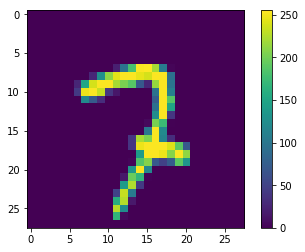

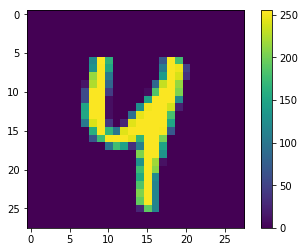

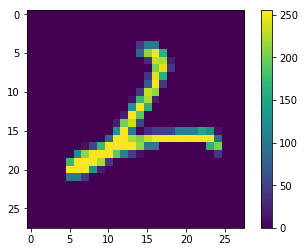

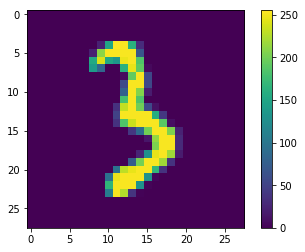

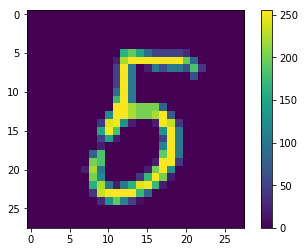

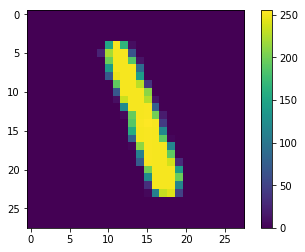

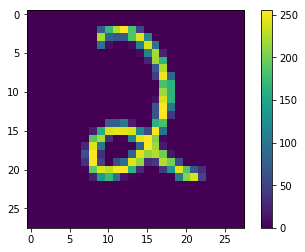

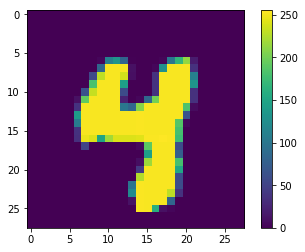

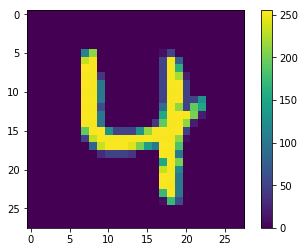

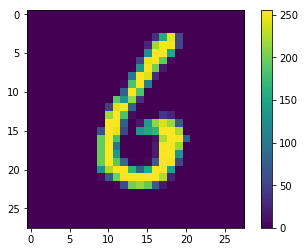

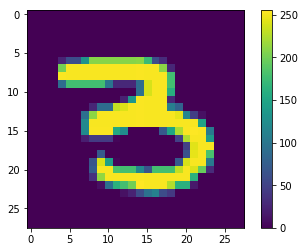

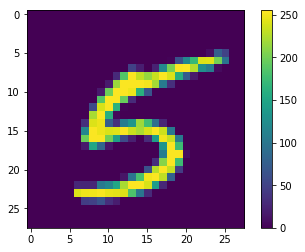

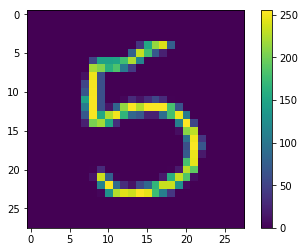

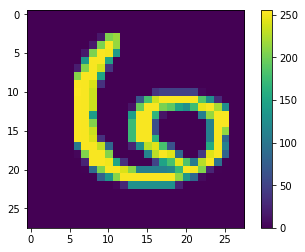

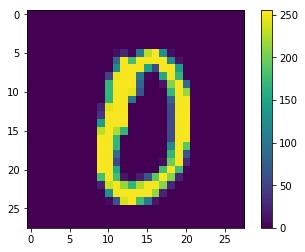

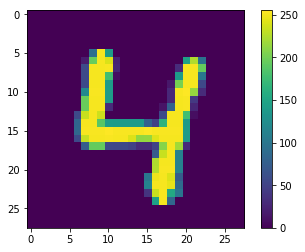

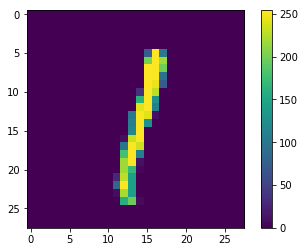

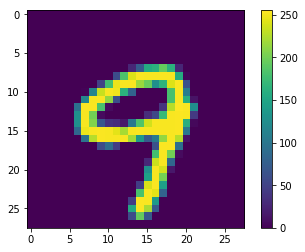

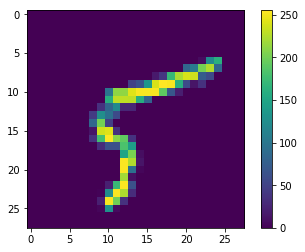

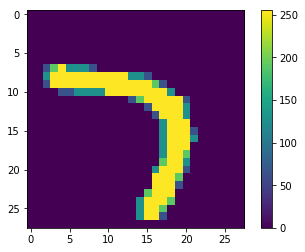

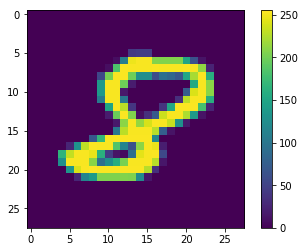

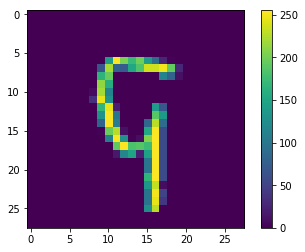

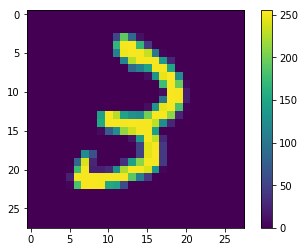

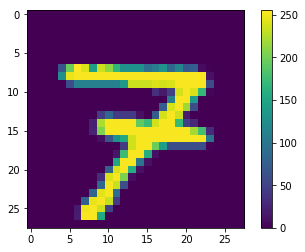

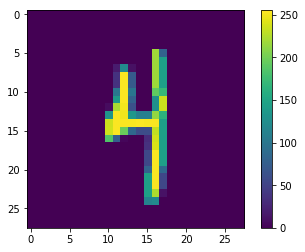

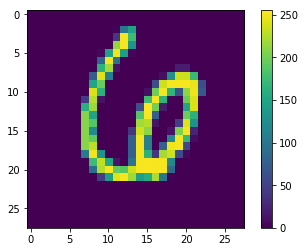

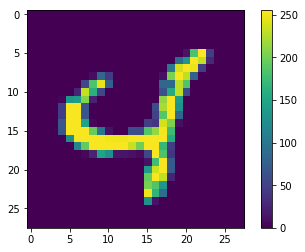

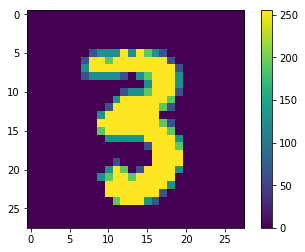

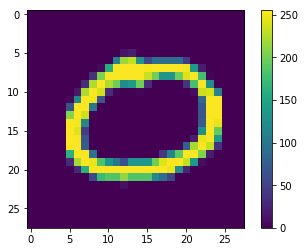

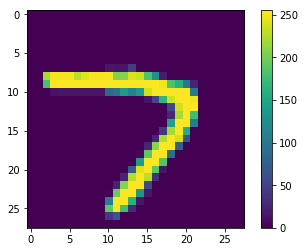

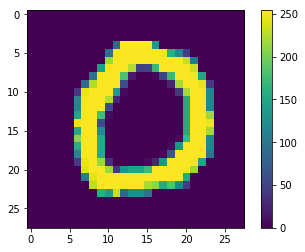

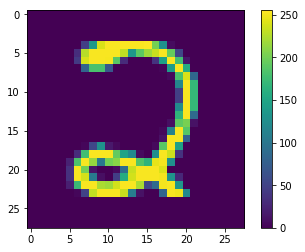

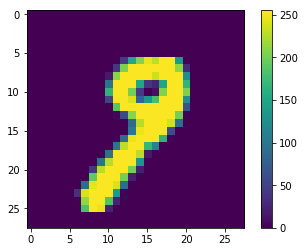

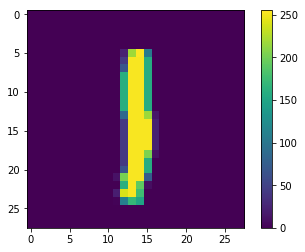

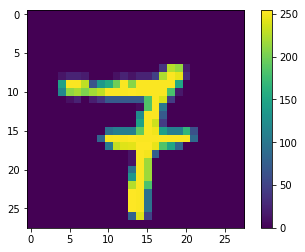

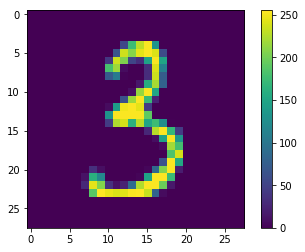

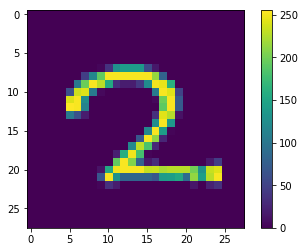

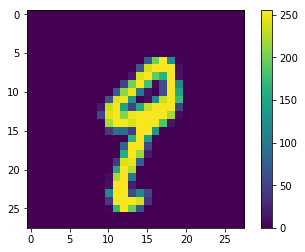

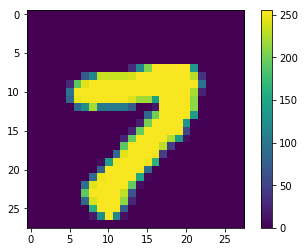

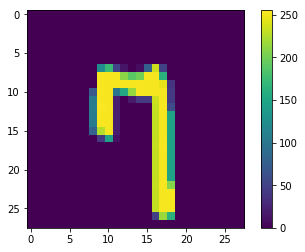

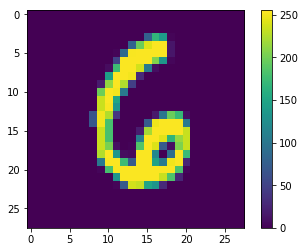

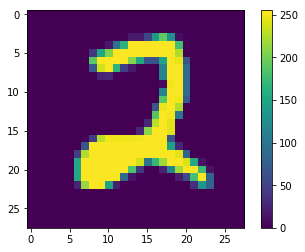

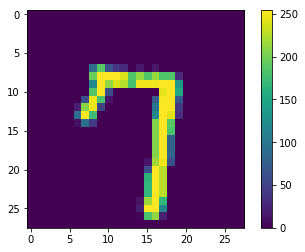

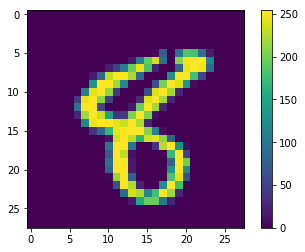

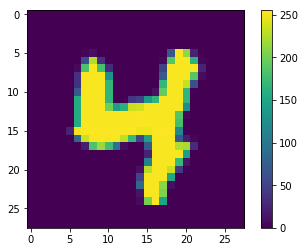

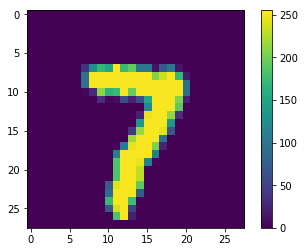

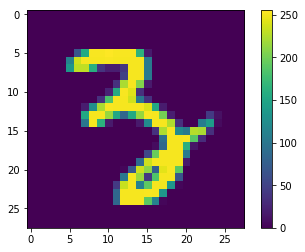

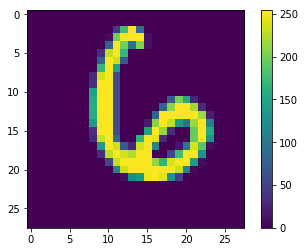

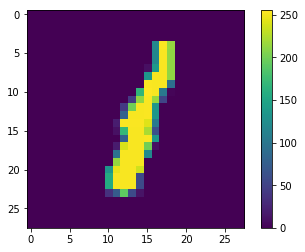

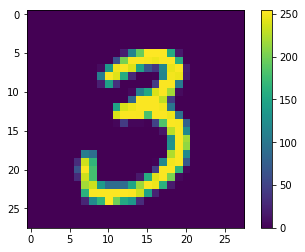

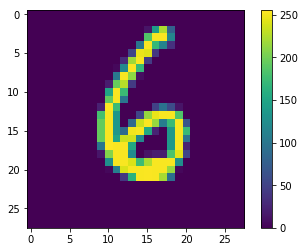

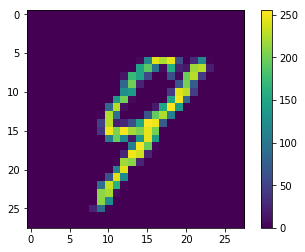

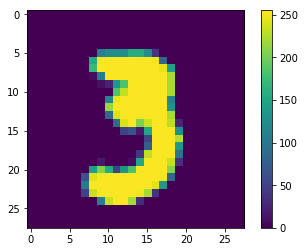

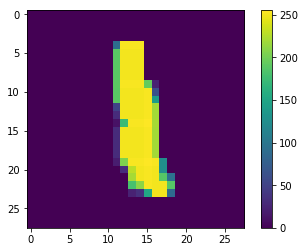

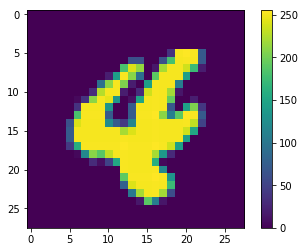

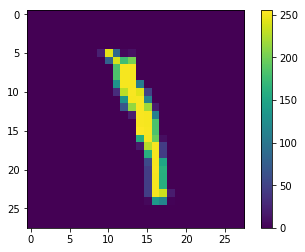

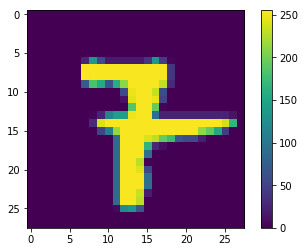

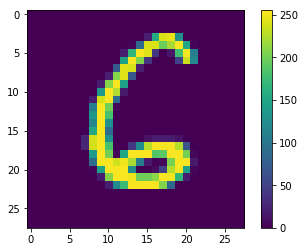

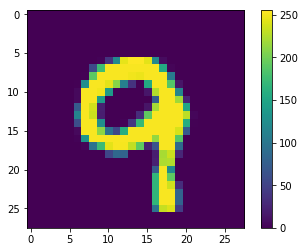

In [20]:
for i in range(0,100):
    plt.figure()
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

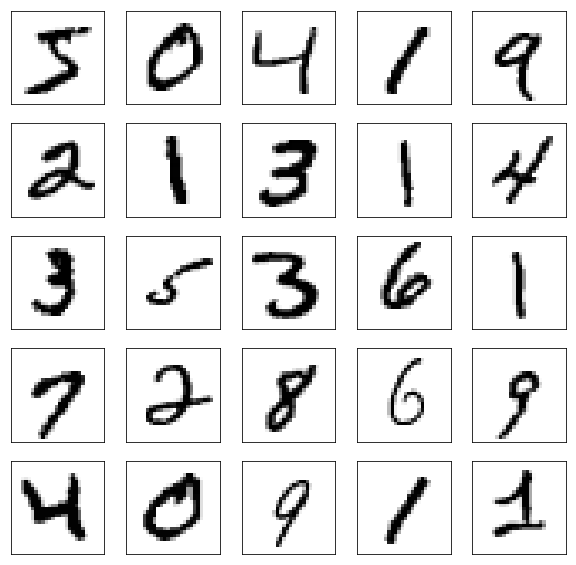

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

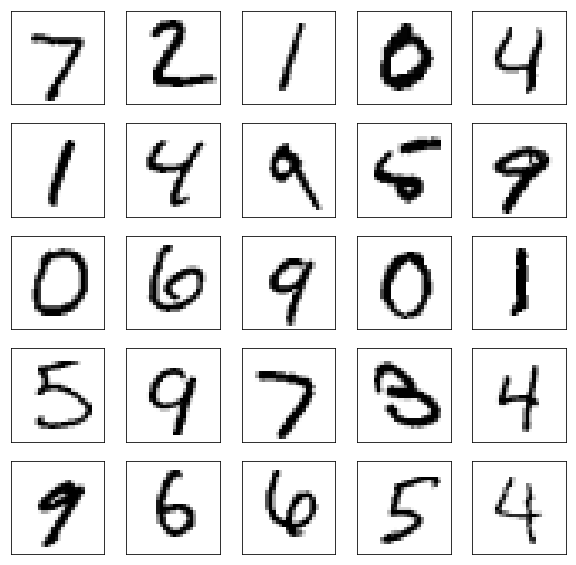

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

In [34]:
print("Dimention of train Images : ",np.ndim(train_images))
print("Shape of train Images : ",np.shape(train_images))
(x,y,z)=np.shape(train_images)
print(f"Num of images: {x} with pixel size of {y} by {z}")

Dimention of train Images :  3
Shape of train Images :  (60000, 28, 28)
Num of images: 60000 with pixel size of 28 by 28


In [39]:
print("Dimention of test Images : ",np.ndim(test_images))
print("Shape of test Images : ",np.shape(test_images))
(a,b,c)=np.shape(test_images)
print(f"Num of images: {a} with pixel size of {b} by {c}")

Dimention of test Images :  3
Shape of test Images :  (10000, 28, 28)
Num of images: 10000 with pixel size of 28 by 28


In [42]:
print("Dimention of test label : ",np.ndim(test_labels))
print("Shape of test label: ",np.shape(test_labels))
print(test_labels)

Dimention of test label :  1
Shape of test label:  (10000,)
[7 2 1 ... 4 5 6]


In [46]:
print("Dimention of train label : ",np.ndim(train_labels))
print("Shape of train label: ",np.shape(train_labels))
print(train_labels)

Dimention of train label :  1
Shape of train label:  (60000,)
[5 0 4 ... 5 6 8]


In [48]:
from keras import models
from keras import layers

In [50]:
network=models.Sequential()

In [54]:
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [57]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [58]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2568 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1029 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0677 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0491 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0374 - acc: 0.9887


In [59]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/step


In [60]:
print('test_acc:', test_acc)

test_acc: 0.98
